# week 12

## 5/21, 5/23, 5/28

In [1]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

cmap(colormap이 binary로 설정 되어 있으면 흑백, binary가 아니면 color)

In [3]:
y_train.shape

(60000,)

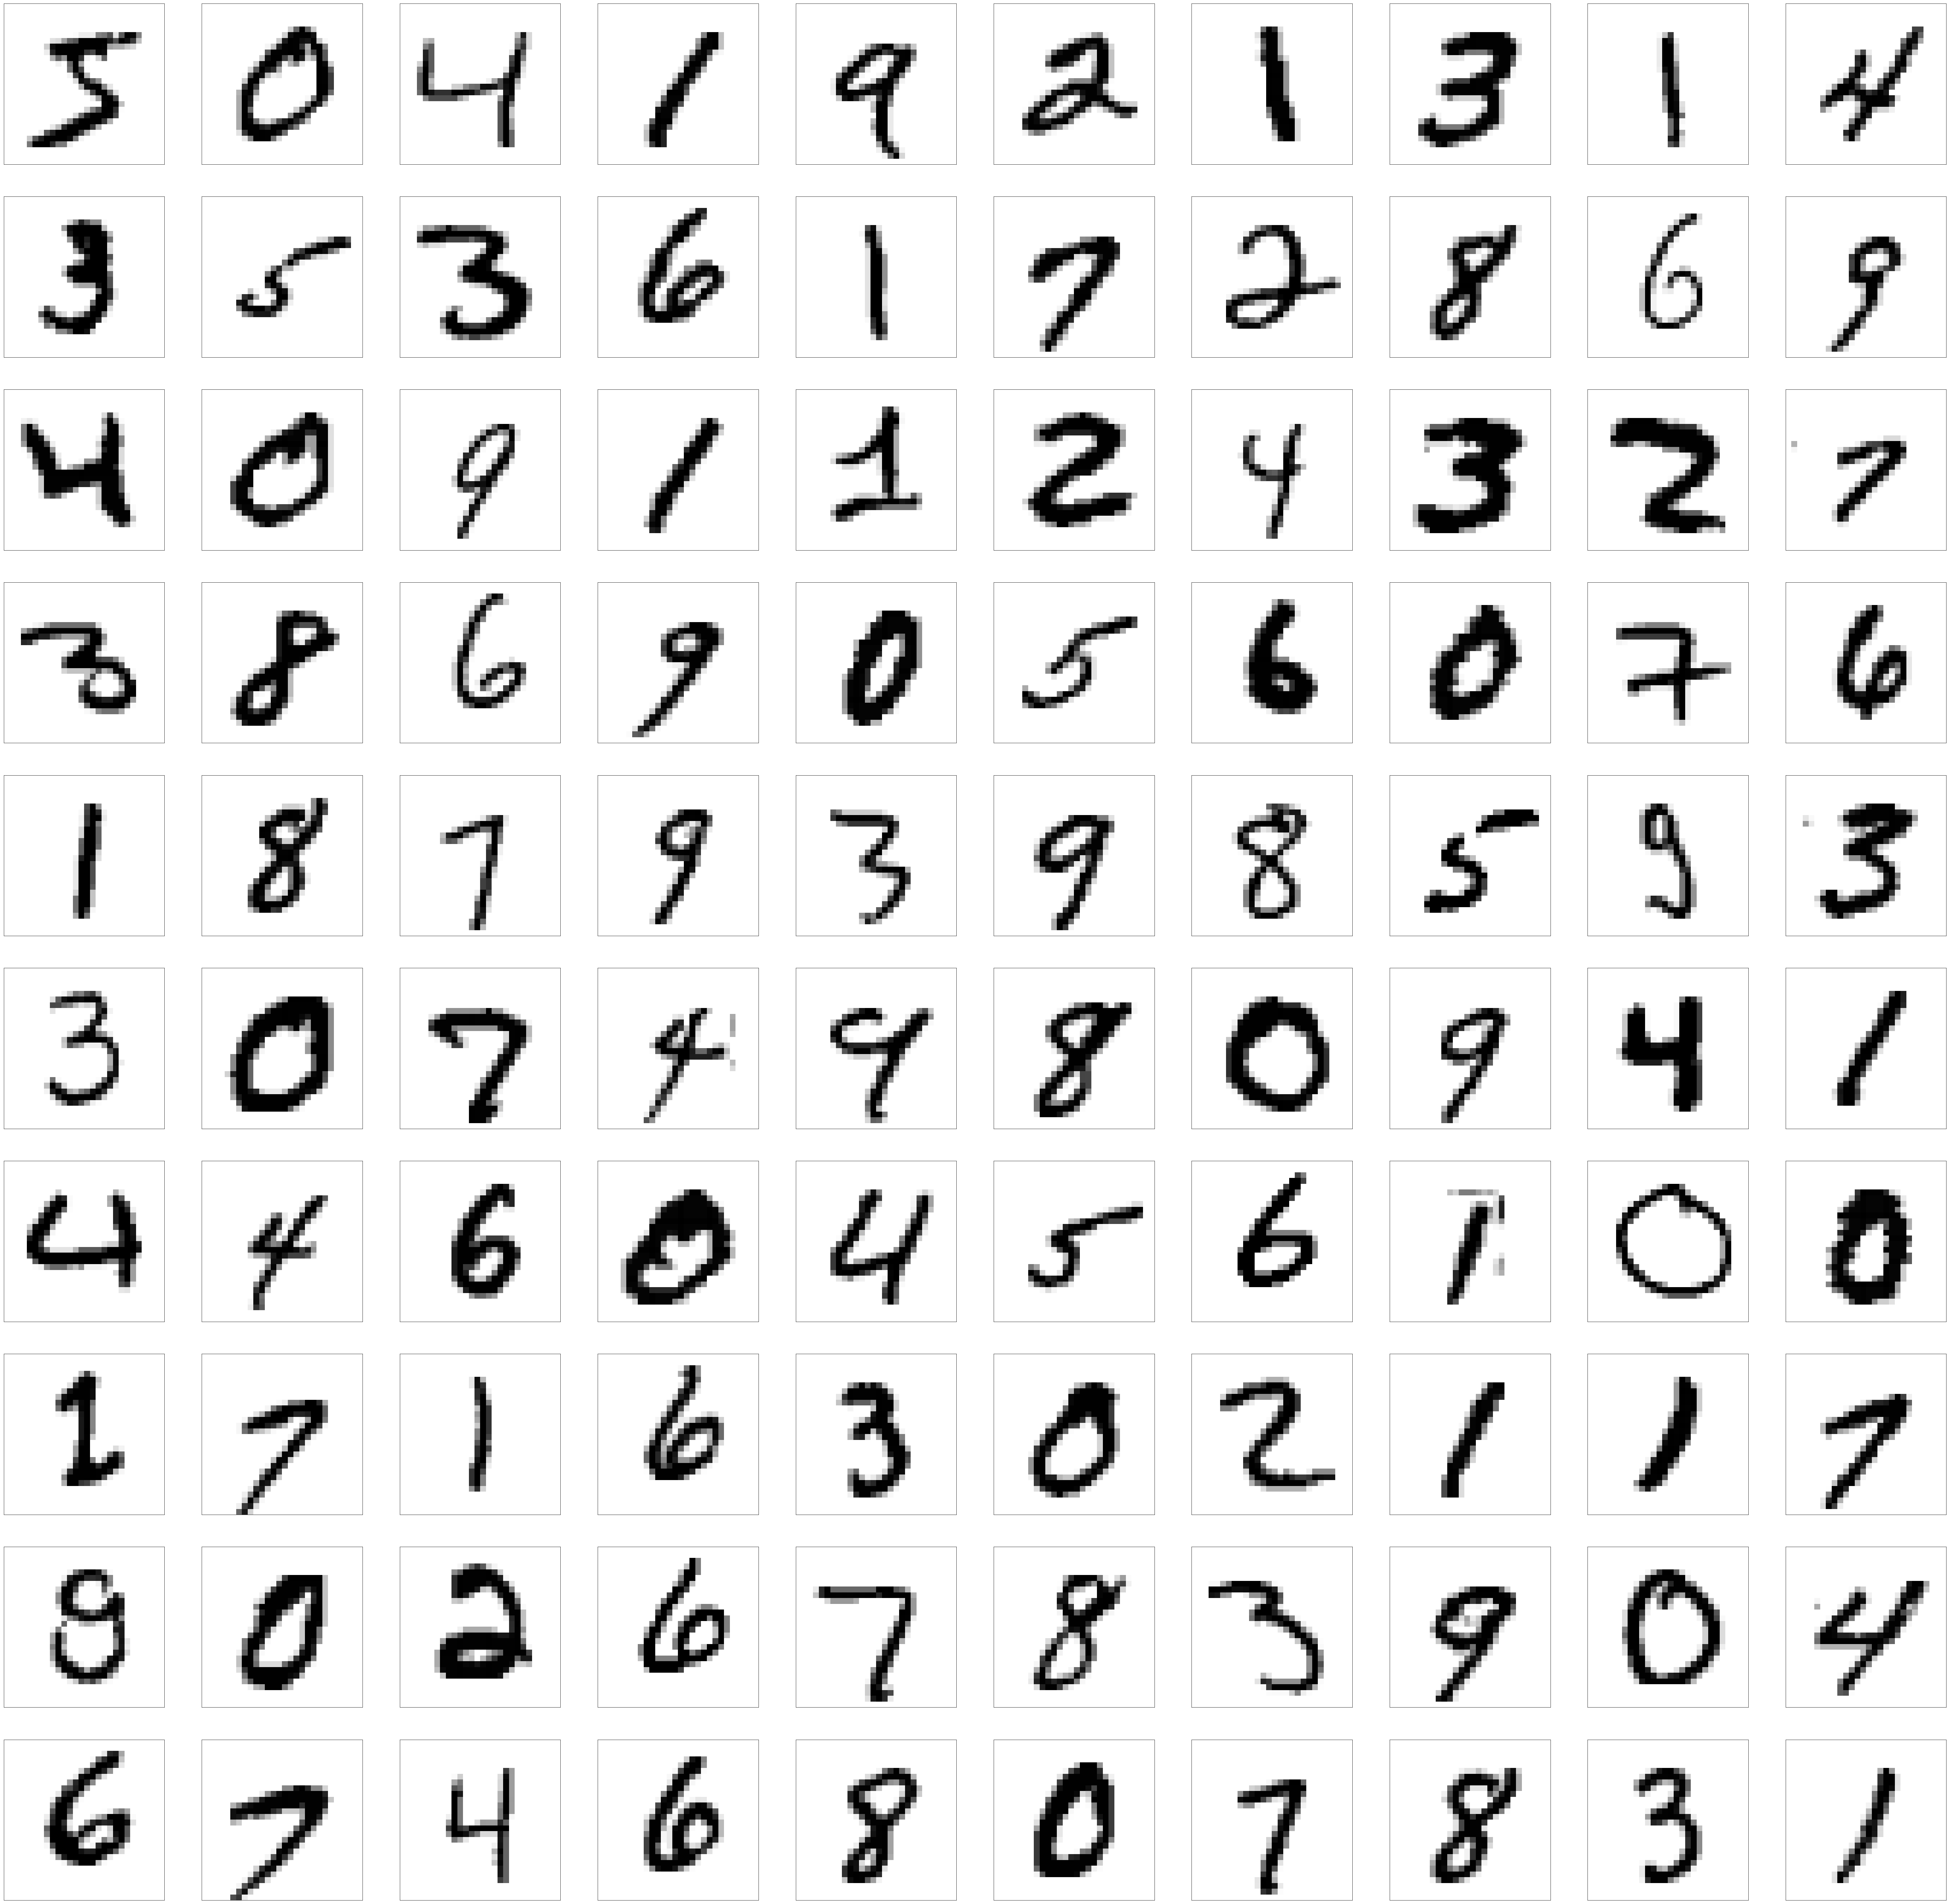

In [4]:
plt.figure(figsize=(100,100)) # size of figure
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

아래와 같이 add 대신 Sequential안에 layer를 쌓는 방법도 있다.

입력을 바로 dense 층에 input_siz=784로 넣지 않고 flatten을 사용하는 이유?

원래 데이터 자체가 2d matrix로 이루어져 있으므로 그대로 이용하기 위해서는 flatten을 이용하여 inputshape = (28,28)로 입력

dropout을 0으로 선택해 탈락되는 값이 없게 설정 했음.

In [5]:
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


컴파일을 할 때, loss에 sparse_categorical_crossentropy 를 사용하면 해당하는 정수로 주어진 y의값을 one-hot vector로 알아서 만들어 줌

In [7]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


x_train과 y_train의 shape

x는 28*28의 mnist 데이터가 60000장, y는 mnist의 실제 값에 해당하는 숫자가 60000개

In [8]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 294us/sample - loss: 0.2217 - acc: 0.9353 - val_loss: 0.1187 - val_acc: 0.9624
Epoch 2/10
48000/48000 [==============================] - 14s 288us/sample - loss: 0.0880 - acc: 0.9738 - val_loss: 0.1047 - val_acc: 0.9670
Epoch 3/10
48000/48000 [==============================] - 11s 236us/sample - loss: 0.0566 - acc: 0.9822 - val_loss: 0.0939 - val_acc: 0.9704
Epoch 4/10
48000/48000 [==============================] - 12s 248us/sample - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0926 - val_acc: 0.9727
Epoch 5/10
48000/48000 [==============================] - 12s 244us/sample - loss: 0.0273 - acc: 0.9916 - val_loss: 0.0893 - val_acc: 0.9757
Epoch 6/10
48000/48000 [==============================] - 12s 241us/sample - loss: 0.0220 - acc: 0.9926 - val_loss: 0.0827 - val_acc: 0.9778
Epoch 7/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.0173 - acc: 0.9946 

overfit - 과적합, 다른 데이터 셋에는 적용이 되지 않음

underfit - 트레인이 덜 된 상황, 개선의 여지가 있음

train 데이터에서 acc이 높아지면서 test도 같이 높아지면 잘 되는 것이지만, test에서 개선이 되지 않으면 과적합이 된 것

loss 역시 train에서 떨어지면서 test에서도 떨어져야 잘 되는 것, test는 떨어지지 않으면 train에 overfit 된 경우

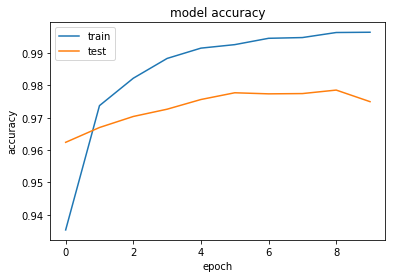

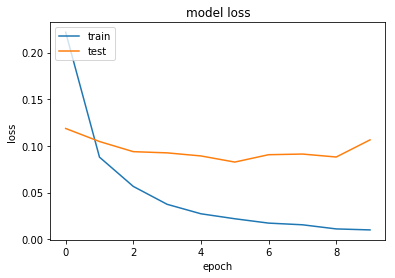

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0937 - acc: 0.9768


[0.09365895971480968, 0.9768]

In [12]:
from IPython.display import HTML

In [13]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [14]:
HTML(input_form + javascript)

In [15]:
len(image)

NameError: name 'image' is not defined

In [ ]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols])
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))